# Housing Prices in King County
Author: Carlos Garza

## Overview

This notebook contains a regression analysis of the cost of King County real estate. Utilizing the CRISP-DM framework, linear regression models, and statistical techniques, I created and refined a model that describes the cost of real estate in King County in relation to a list of independent variables. 

My data, methodology, and derived conclusions are detailed in the body of this document.

## Business Problem

To gain an edge in the industry, a Seattle-based real estate company wants to automate their initial appraisal process. Developing an algorithm to accurately appraise the value of a house without physically inspecting the property can be an invaluable advantage in the fast paced real estate market of a rapidly expanding city. Using county data and multiple linear regression I created a model the company can use to predict real estate values.

## Data

The data utilized in this model describes houses sold in 2014 and 2015.

The data is summarized below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# Data Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
# Exploration of Values
for column in df.columns:
    print(column, '\n')
    print(df[column].value_counts())
    print('________')

id 

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
________
date 

6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
8/30/2014      1
1/17/2015      1
1/31/2015      1
8/3/2014       1
5/27/2015      1
Name: date, Length: 372, dtype: int64
________
price 

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
________
bedrooms 

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
________
bathrooms 

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3

## Data Preprocessing

To begin, columns we are not interested in will be dropped. We are not concerned with the date the house was sold or if the house has been viewed.

Additionally, because all of our data ranges over only two years, we will count multiple sales of the same house independently, and therefore can drop the house ID.
The rational behind this is that houses constantly on the market may hint at some underlining issue that may or may not be described numerically by our data so we will leave each sale in our analysis to obtain the broadest picture. 

In [5]:
df.drop(columns = ['id', 'date', 'view'], inplace = True)

Observing the data types and value counts in our data exploration above it can be seen that basement square footage is stored as a string. most values can be expressed as floats, so we will change data types to be treated as a continuous variable. unknown values (stored as '?') will be changed to 0.0

In [6]:
df['sqft_basement'].replace('?','0.0', inplace = True)
df['sqft_basement'] = df['sqft_basement'].astype('float')

Now that all of our data is in a usable format, we can create our first baseline model

## Baseline Model

To keep as much data as possible in all future models, we will not drop missing values from our data until just before creating a new model

In [7]:
baseline_data = df.dropna()
baseline_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15809 entries, 1 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15809 non-null  float64
 1   bedrooms       15809 non-null  int64  
 2   bathrooms      15809 non-null  float64
 3   sqft_living    15809 non-null  int64  
 4   sqft_lot       15809 non-null  int64  
 5   floors         15809 non-null  float64
 6   waterfront     15809 non-null  float64
 7   condition      15809 non-null  int64  
 8   grade          15809 non-null  int64  
 9   sqft_above     15809 non-null  int64  
 10  sqft_basement  15809 non-null  float64
 11  yr_built       15809 non-null  int64  
 12  yr_renovated   15809 non-null  float64
 13  zipcode        15809 non-null  int64  
 14  lat            15809 non-null  float64
 15  long           15809 non-null  float64
 16  sqft_living15  15809 non-null  int64  
 17  sqft_lot15     15809 non-null  int64  
dtypes: flo

In [8]:
import statsmodels.api as sm

In [9]:
baseline_predictors = baseline_data.drop('price', axis=1)
model = sm.OLS(baseline_data['price'], sm.add_constant(baseline_predictors)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     2103.
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        01:27:20   Log-Likelihood:            -2.1594e+05
No. Observations:               15809   AIC:                         4.319e+05
Df Residuals:                   15791   BIC:                         4.320e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.373e+06   3.51e+06     -0.675      0.499   -9.26e+06    4.51e+06
bedrooms      -4.066e+04   2249.400    -18.074      0.000   -4.51e+04   -3.62e+04
bathrooms      4.608e+04   3924.315     11.743      0.000    3.84e+04    5.38e+04
sqft_living     157.4150     21.879      7.195      0.000     114.530     200.300
sqft_lot          0.1354      0.057      2.371      0.018       0.023       0.247
floors         5905.1578   4336.868      1.362      0.173   -2595.600    1.44e+04
waterfront     7.917e+05   1.92e+04     41.132      0.000    7.54e+05    8.29e+05
condition      2.762e+04   2829.941      9.759      0.000    2.21e+04    3.32e+04
grade          9.804e+04   2603.022     37.663      0.000    9.29e+04    1.03e+05
sqft_above       35.3500     21.823      1.620      0.105      -7.425      78.125
sqft_basement    14.4558     21.658      0.667      0.504     -27.997      56.908
yr_built      -2821.6048     87.044    -32.416      0.000   -2992.221   -2650.988
yr_renovated     21.8909      4.438      4.932      0.000      13.191      30.590
zipcode        -496.6853     39.529    -12.565      0.000    -574.167    -419.204
lat            5.813e+05   1.28e+04     45.244      0.000    5.56e+05    6.07e+05
long          -2.313e+05   1.58e+04    -14.639      0.000   -2.62e+05      -2e+05
sqft_living15    27.9778      4.128      6.778      0.000      19.887      36.069
sqft_lot15       -0.3309      0.086     -3.847      0.000      -0.500      -0.162
==============================================================================
Omnibus:                    13670.728   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1430940.355
Skew:                           3.652   Prob(JB):                         0.00
Kurtosis:                      49.032   Cond. No.                     2.15e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Tuning/ Reitteration

### Statistically Insignificant Variables/Collinearity

To achieve a better fit, the model can be tuned. Setting alpha to 0.05, we can determine which variables are not statistically significant and can be dropped. Additionally, examining the collinearity of the independent variables can give clues on what variables to drop to improve our R-squared value in the next itteration. The table below shows the correlation between the independent variables.

In [10]:
lin_test=baseline_predictors.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
lin_test['pairs'] = list(zip(lin_test.level_0, lin_test.level_1))
# set index to pairs
lin_test.set_index(['pairs'], inplace = True)
#d rop level columns
lin_test.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column as cc rather than 0
lin_test.columns = ['cc']
# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
lin_test.drop_duplicates(inplace=True)
lin_test.head(15)

,cc
pairs,
"(bedrooms, bedrooms)",1.000000
"(sqft_above, sqft_living)",0.876023
"(grade, sqft_living)",0.764699
"(grade, sqft_above)",0.758407
"(sqft_living, sqft_living15)",0.756818
"(sqft_living, bathrooms)",0.754361
"(sqft_above, sqft_living15)",0.732934
"(sqft_lot, sqft_lot15)",0.719935
"(sqft_living15, grade)",0.717371


To start, variables with a P-value above our threshhold (alpha) are dropped. Additionally, some variables with high collinearity are dropped.

In [11]:
to_drop = ['floors', 'sqft_above', 'sqft_basement','sqft_lot', 'sqft_lot15', 'sqft_living15']

df.drop(to_drop, axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3,1.00,1180,NaN,3,7,1955,0.0,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,0.0,3,7,1951,1991.0,98125,47.7210,-122.319
2,180000.0,2,1.00,770,0.0,3,6,1933,NaN,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,0.0,5,7,1965,0.0,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,0.0,3,8,1987,0.0,98074,47.6168,-122.045


In [12]:
model_2_data = df.dropna()
model_2_predictors = model_2_data.drop('price', axis=1)
model = sm.OLS(model_2_data['price'], sm.add_constant(model_2_predictors)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     3224.
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        01:27:20   Log-Likelihood:            -2.1598e+05
No. Observations:               15809   AIC:                         4.320e+05
Df Residuals:                   15797   BIC:                         4.321e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.651e+06   3.36e+06      0.790      0.430   -3.93e+06    9.23e+06
bedrooms     -4.074e+04   2244.302    -18.154      0.000   -4.51e+04   -3.63e+04
bathrooms     4.565e+04   3783.151     12.068      0.000    3.82e+04    5.31e+04
sqft_living    194.4893      3.662     53.114      0.000     187.312     201.667
waterfront    7.928e+05   1.93e+04     41.112      0.000    7.55e+05    8.31e+05
condition     2.453e+04   2810.180      8.728      0.000     1.9e+04       3e+04
grade         1.071e+05   2407.087     44.478      0.000    1.02e+05    1.12e+05
yr_built     -2791.2713     84.465    -33.046      0.000   -2956.832   -2625.710
yr_renovated    20.4666      4.438      4.611      0.000      11.767      29.166
zipcode       -516.7809     39.280    -13.156      0.000    -593.774    -439.788
lat            5.81e+05   1.28e+04     45.511      0.000    5.56e+05    6.06e+05
long          -2.06e+05    1.5e+04    -13.746      0.000   -2.35e+05   -1.77e+05
==============================================================================
Omnibus:                    13471.346   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1339076.232
Skew:                           3.580   Prob(JB):                         0.00
Kurtosis:                      47.515   Cond. No.                     1.99e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

____
We will not drop any more full columns, so we can commit to dropping rows with missing data.

In [13]:
df.dropna(inplace = True)

### Categorical Variables

Next, we'll recheck the values of our columns to see if any variables are categorical.

In [14]:
# Exploration of Values
for column in df.columns:
    print(column, '\n')
    print(df[column].value_counts())
    print('________')

price 

350000.0    130
450000.0    121
500000.0    115
550000.0    113
425000.0    111
           ... 
959750.0      1
503500.0      1
927000.0      1
648475.0      1
311300.0      1
Name: price, Length: 3042, dtype: int64
________
bedrooms 

3     7143
4     5094
2     2007
5     1186
6      194
1      141
7       23
8       10
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
________
bathrooms 

2.50    4013
1.00    2769
1.75    2235
2.25    1494
2.00    1398
1.50    1064
2.75     853
3.50     544
3.00     544
3.25     432
3.75     104
4.00     100
4.50      75
4.25      62
0.75      50
4.75      17
5.00      14
5.25      11
5.50       8
6.00       6
1.25       6
0.50       3
8.00       2
5.75       2
7.75       1
7.50       1
6.75       1
Name: bathrooms, dtype: int64
________
sqft_living 

1820    102
1440    100
1400     98
1300     95
1320     94
       ... 
1794      1
1802      1
1834      1
5960      1
1715      1
Name: sqft_living, Length: 913, dtype:

Condition, grade, and zipcode columns can likely be treated as categorical variables, so will be converted to dummy variables.

In [15]:
categoricals = ['condition', 'grade', 'zipcode']
condition_cat = pd.get_dummies(df['condition'], prefix = 'condition', drop_first=True)
grade_cat = pd.get_dummies(df['grade'], prefix = 'grade', drop_first=True)
zipcode_cat = pd.get_dummies(df['zipcode'], prefix = 'zipcode', drop_first = True)
df = df.drop(columns = categoricals)
df = pd.concat([df, condition_cat, grade_cat, zipcode_cat], axis=1)

additionally, the 'yr_renovated' column will be converted to a categorical 'renovated' column

In [16]:
df['renovated'] = df['yr_renovated'].map(lambda x: 0 if x == 0 else 1)
df.drop(columns=['yr_renovated'], inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,yr_built,lat,long,condition_2,condition_3,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated
1,538000.0,3,2.25,2570,0.0,1951,47.7210,-122.319,0,1,...,0,0,0,0,0,0,0,0,0,1
3,604000.0,4,3.00,1960,0.0,1965,47.5208,-122.393,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,0.0,1987,47.6168,-122.045,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1230000.0,4,4.50,5420,0.0,2001,47.6561,-122.005,0,1,...,0,0,0,0,0,0,0,0,0,0
6,257500.0,3,2.25,1715,0.0,1995,47.3097,-122.327,0,1,...,0,0,0,0,0,0,0,0,0,0


Future models in this notebook will be created with Scikit Learn

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lin_reg_3 = LinearRegression()
y = df['price']
X = df.drop(['price'], axis = 1)
lin_reg_3.fit(X, y)
print('R-Squared: ', lin_reg_3.score(X, y))

R-Squared:  0.8241407664576075


### Normalization/Log Transformations

Using histograms, continuous variables are checked for normality and outliers

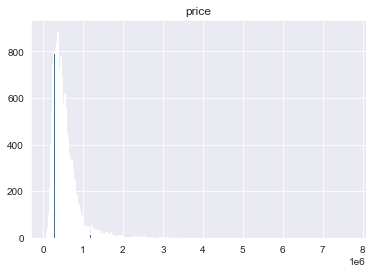

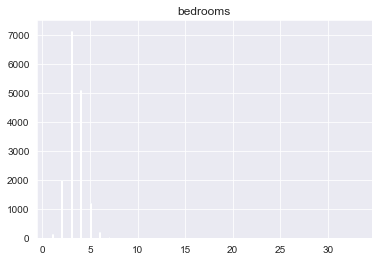

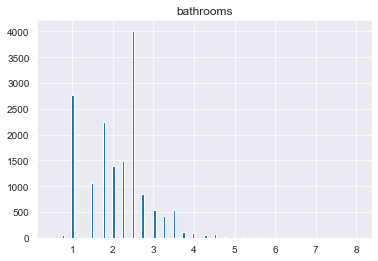

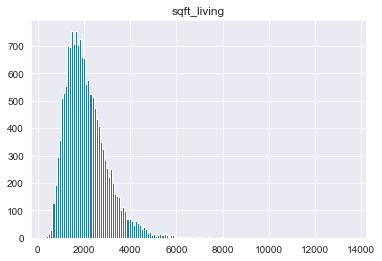

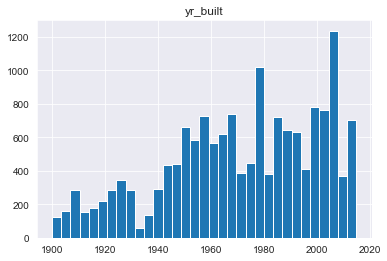

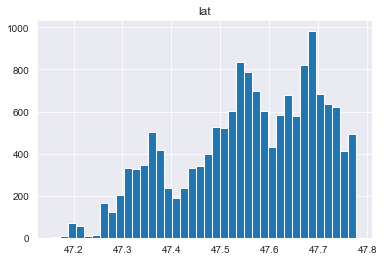

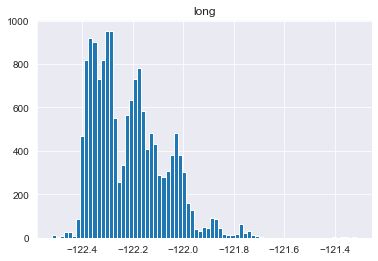

In [19]:
continuous = ['price', 'bedrooms','bathrooms', 'sqft_living', 'yr_built', 'lat', 'long']
for var in continuous:
    df[var].hist(bins='auto')
    plt.title(var)
    plt.show()

<AxesSubplot:>

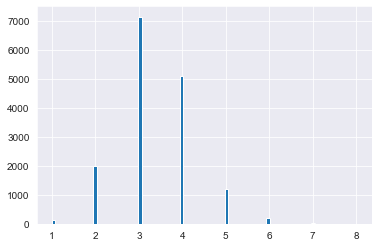

In [20]:
# Bedroom outliers
df.drop(df.loc[df['bedrooms'] > 8].index, inplace=True)
df['bedrooms'].hist(bins = 'auto')

In [21]:
# Log Transformations
df['log_long'] = df['long'].map(lambda x: np.log(x*-1))
df.drop('long', axis = 1, inplace = True)
df['log_lat'] = df['lat'].map(lambda x: np.log(x))
df.drop('lat', axis = 1, inplace = True)
df['log_yr_built'] = df['yr_built'].map(lambda x: np.log(x))
df.drop('yr_built', axis = 1, inplace = True)
df['log_sqft_living'] = df['sqft_living'].map(lambda x: np.log(x))
df.drop('sqft_living', axis = 1, inplace = True)
df['log_bed'] = df['bedrooms'].map(lambda x: np.log(x))
df.drop('bedrooms', axis = 1, inplace = True)
df['log_price'] = df['price'].map(lambda x: np.log(x))
df.drop('price', axis = 1, inplace = True)

In [22]:
df.head()

,bathrooms,waterfront,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,...,zipcode_98188,zipcode_98198,zipcode_98199,renovated,log_long,log_lat,log_yr_built,log_sqft_living,log_bed,log_price
1,2.25,0.0,0,1,0,0,0,0,0,1,...,0,0,0,1,4.806632,3.865372,7.576097,7.851661,1.098612,13.195614
3,3.00,0.0,0,0,0,1,0,0,0,1,...,0,0,0,0,4.807237,3.861168,7.583248,7.580700,1.386294,13.311329
4,2.00,0.0,0,1,0,0,0,0,0,0,...,0,0,0,0,4.804390,3.863186,7.594381,7.426549,1.098612,13.142166
5,4.50,0.0,0,1,0,0,0,0,0,0,...,0,0,0,0,4.804062,3.864011,7.601402,8.597851,1.386294,14.022525
6,2.25,0.0,0,1,0,0,0,0,0,1,...,0,0,0,0,4.806698,3.856715,7.598399,7.447168,1.098612,12.458775


In [23]:
lin_reg_4 = LinearRegression()
y = df['log_price'].map(lambda x: np.log(x))
X = df.drop(['log_price'], axis = 1)
lin_reg_4.fit(X, y)
print('R-Squared: ', lin_reg_4.score(X, y))

R-Squared:  0.8666057935678042


With a model that represents 86% of the variation of data, We can move forward to model evaluation.

## Model Evaluation

Using Scikitlearn to randomly split the data into a train group and a test group, the model can be evaluated for accuracy

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [25]:
X = df.drop('log_price', axis = 1)
y = df['log_price']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [27]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
print('R-Squared: ', linreg.score(X_train, y_train))

R-Squared:  0.869977926913589


In [28]:
train_mse = mse(y_train, y_hat_train)
test_mse = mse(y_test, y_hat_test)
print('Train MSE: ', train_mse)
print('Test MSE: ', test_mse)

Train MSE:  0.036489285191238986
Test MSE:  0.03557006385066405


The mean squared error of the test data is actually lower than the mean squared error of the training data. This is a good sign that our model is properly fitted.

Lastly, the distribution of residuals will be analyzed.

In [29]:
residuals = y_test - linreg.predict(X_test)

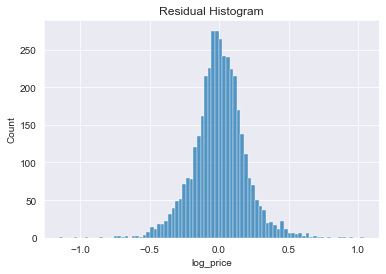

In [30]:
sns.histplot(residuals);
plt.title('Residual Histogram');

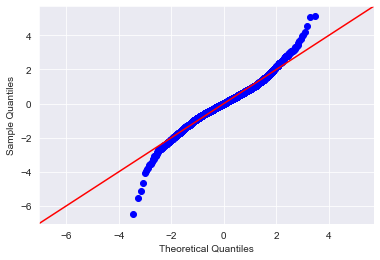

In [31]:
import scipy.stats as stats
model = sm.OLS(y_test, sm.add_constant(X_test)).fit()
sm_residuals = model.resid
fig = sm.graphics.qqplot(sm_residuals, dist=stats.norm, line='45', fit=True)


The residuals of the model are not perfectly normal. this may cause some issues with price predictions at the upper and lower levels of our distribution.

## Deployment

Using the pickle module, we can store our model and use it in a leaner notebook or .py file to predict the value of a house in King County.

In [32]:
import pickle
with open('deployment/regression_model.pickle', 'wb') as f:
    pickle.dump(linreg, f)

In [33]:
house_df = pd.DataFrame(np.zeros((1, len(X.columns))), columns = X.columns)
with open('deployment/house_data.pickle', 'wb') as f:
    pickle.dump(house_df, f)

Using our regression model and a datadrame template to be filled out and fed to the model, I created house_price_prediction.py which can be run from the terminal to predict real estate prices in King County

## Conclusions

After cleaning and normalizing data on real estate prices in King County, A multiple linear regression model was created that captures 86% of our data's variance.

The dataset is suitably linear, and its residuals follow a near-normal distribution, but there is some heteroscedasticity in the data that suggests some inaccuracy.

This model was exported to <code>house_price_prediction.py</code> so it can be used in the backend of a prediction software for a real estate company to automate the initial appraisal of houses in King County.

## Future Work

+ Create GUI that takes data and delivers a price estimate.
+ Explore using multiple models for different locations to achieve higher accuracy
+ Modify function to accept an address as an input rather than taking zipcode, latitude, and longitude separately